### Stock Market Prediction And Forecasting Using Stacked LSTM

In [57]:
### Keras and Tensorflow >2.0
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 376.9/376.9 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 5.5/5.5 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 8.2 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 127.8/127.8 kB ? eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 7.2 MB/s eta 0:00:00
     ----------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install pandas_datareader


Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 109.5/109.5 kB 576.9 kB/s eta 0:00:00


In [15]:
### Data Collection
import numpy as np
import pandas as pd
import pandas_datareader as pdr
key="a507e516bc604caa238ad3e166808d7e9ce1a494"

In [36]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [26]:
df.to_csv('TSLA.csv')

In [37]:
df=pd.read_csv('TSLA.csv')

In [38]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2019-07-01 00:00:00+00:00,227.17,233.10,226.28,230.21,8237964,15.144667,15.540000,15.085333,15.347333,123569460,0.0,1.0
1,TSLA,2019-07-02 00:00:00+00:00,224.55,229.15,222.22,228.89,9259027,14.970000,15.276667,14.814667,15.259333,138885405,0.0,1.0
2,TSLA,2019-07-03 00:00:00+00:00,234.90,241.57,234.51,239.39,14201148,15.660000,16.104667,15.634000,15.959333,213017220,0.0,1.0
3,TSLA,2019-07-05 00:00:00+00:00,233.10,235.45,230.80,234.57,7065738,15.540000,15.696667,15.386667,15.638000,105986070,0.0,1.0
4,TSLA,2019-07-08 00:00:00+00:00,230.34,232.25,228.66,231.24,5880542,15.356000,15.483333,15.244000,15.416000,88208130,0.0,1.0


In [39]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,TSLA,2024-06-20 00:00:00+00:00,181.57,185.210,179.66,184.68,55893139,181.57,185.210,179.66,184.68,55893139,0.0,1.0
1252,TSLA,2024-06-21 00:00:00+00:00,183.01,183.950,180.69,182.30,63029482,183.01,183.950,180.69,182.30,63029482,0.0,1.0
1253,TSLA,2024-06-24 00:00:00+00:00,182.58,188.800,182.55,184.97,61992070,182.58,188.800,182.55,184.97,61992070,0.0,1.0
1254,TSLA,2024-06-25 00:00:00+00:00,187.35,187.970,182.01,184.40,63678265,187.35,187.970,182.01,184.40,63678265,0.0,1.0
1255,TSLA,2024-06-26 00:00:00+00:00,196.37,197.755,186.36,186.54,94940938,196.37,197.755,186.36,186.54,94940938,0.0,1.0


In [40]:
# required column
df1=df.reset_index()['close']

In [41]:
df1

0       227.17
1       224.55
2       234.90
3       233.10
4       230.34
         ...  
1251    181.57
1252    183.01
1253    182.58
1254    187.35
1255    196.37
Name: close, Length: 1256, dtype: float64

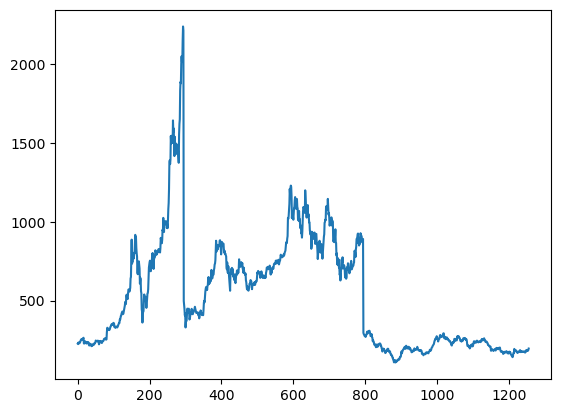

In [42]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [43]:
df1

0       227.17
1       224.55
2       234.90
3       233.10
4       230.34
         ...  
1251    181.57
1252    183.01
1253    182.58
1254    187.35
1255    196.37
Name: close, Length: 1256, dtype: float64

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [45]:
print(df1)

[[0.05588435]
 [0.05465468]
 [0.05951236]
 ...
 [0.03495647]
 [0.03719522]
 [0.04142867]]


In [46]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [47]:
training_size,test_size

(816, 440)

In [48]:
train_data

array([[0.05588435],
       [0.05465468],
       [0.05951236],
       [0.05866754],
       [0.05737216],
       [0.05724075],
       [0.0613991 ],
       [0.06124891],
       [0.06429024],
       [0.06824209],
       [0.06771642],
       [0.06888039],
       [0.06826086],
       [0.0704386 ],
       [0.06926525],
       [0.07137259],
       [0.07358318],
       [0.05665877],
       [0.05629268],
       [0.05992068],
       [0.0629667 ],
       [0.06266163],
       [0.05901955],
       [0.05924952],
       [0.0564241 ],
       [0.05756459],
       [0.05881773],
       [0.06110811],
       [0.05956398],
       [0.05674794],
       [0.05955929],
       [0.05234083],
       [0.05047286],
       [0.05249102],
       [0.05572478],
       [0.05526952],
       [0.05290874],
       [0.05352827],
       [0.04848286],
       [0.05017248],
       [0.04974069],
       [0.05044939],
       [0.05332176],
       [0.05515218],
       [0.05487058],
       [0.05283834],
       [0.05701546],
       [0.056

In [51]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [52]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [53]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [54]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [55]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [58]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [59]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - loss: 0.0743 - val_loss: 0.0125
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.0125 - val_loss: 0.0151
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 0.0109 - val_loss: 0.0069
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 0.0092 - val_loss: 0.0046
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.0082 - val_loss: 0.0028
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0065 - val_loss: 0.0020
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.0059 - val_loss: 0.0021
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.0069 - val_loss: 0.0025
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 0.0054 - val_loss: 0.0029
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 0.0060 - val_loss: 0.0013
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0066 - val_loss: 8.4093e-04
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 67/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0013 - val_loss: 1.1720e-04
Epoch 68/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0040 - val_loss: 0.0017
Epoch 69/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0035 - val_loss: 1.0435e-04
Epoch 70/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0019 - val_loss: 1.4118e-04
Epoch 71/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0025 - val_loss: 2.9067e-04
Epoch 72/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.0022 - val_loss: 4.5476e-04
Epoch 73/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0032 - val_loss: 3.1298e-05
Epoch 74/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.0018 - val_loss: 3.9985e-04
Epoch 75/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 76/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 0.0026 - val_loss: 1.6522e-04
Epoch 77/100
12/

In [63]:
import tensorflow as tf

In [64]:
tf.__version__

'2.16.1'

In [65]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [66]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [67]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

819.4318256403776

In [68]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

257.59452848019237

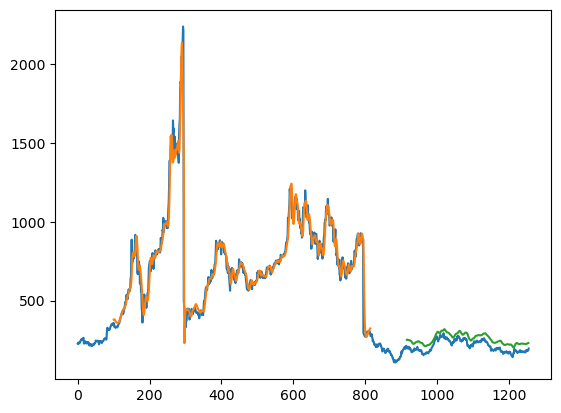

In [70]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [71]:
len(test_data)

440

In [79]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [80]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [81]:
temp_input

[0.034243071363199026,
 0.03613920634548143,
 0.03730317039401122,
 0.038232464271466454,
 0.040114519043484384,
 0.037561307582193226,
 0.03563231877596039,
 0.037833524980639716,
 0.043343580597470246,
 0.0431089104263957,
 0.04020369370849271,
 0.040677727454063325,
 0.04191678595733696,
 0.039363574496045814,
 0.042850773238213694,
 0.04300565555112289,
 0.04408983174148734,
 0.044014737286743474,
 0.0443714359467768,
 0.03756600098561472,
 0.03409288245371131,
 0.03212165301668504,
 0.03311196113861968,
 0.03155844460610613,
 0.032698941637528456,
 0.032590993358834155,
 0.028808110201112333,
 0.02553211461291155,
 0.026034308779011098,
 0.030835660479196503,
 0.029671696430666694,
 0.03170863351559383,
 0.030375706943890357,
 0.02944171966301365,
 0.030286532278882033,
 0.032652007603313535,
 0.03366578274235563,
 0.03176964776007321,
 0.031502123765048226,
 0.027470490225987382,
 0.028291835824748313,
 0.02957313495881539,
 0.02665853143406942,
 0.030450801398634222,
 0.03228122

In [84]:
# demonstrate prediction for next 10 days
from numpy import array

# List to store the output predictions
lst_output = []
n_steps = 99  # Adjusted to match the current length of x_input
i = 0

# Predict the next 30 days
while(i < 30):
    if(len(temp_input) > n_steps):
        # Prepare the input sequence for prediction
        x_input = np.array(temp_input[-n_steps:])  # Take the last 99 elements
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        # Predict the next value
        yhat = model.predict(x_input, verbose=0)
        
        # Append the predicted value to temp_input
        temp_input.extend(yhat[0].tolist())
        
        # Store the predicted value
        lst_output.extend(yhat.tolist())
        
        i = i + 1
    else:
        # If the length of temp_input is still less than n_steps, continue reshaping
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        
        i = i + 1

print("Predicted values for next 30 days:", lst_output)

Predicted values for next 30 days: [[0.058990780264139175], [0.06155110150575638], [0.06562143564224243], [0.07054880261421204], [0.0758361667394638], [0.0812012106180191], [0.08651439845561981], [0.0917293131351471], [0.09683625400066376], [0.10183800756931305], [0.1067395955324173], [0.11154481023550034], [0.11625595390796661], [0.12087392061948776], [0.12539878487586975], [0.12982991337776184], [0.13416627049446106], [0.13840660452842712], [0.14254960417747498], [0.14659398794174194], [0.1505385935306549], [0.15438273549079895], [0.15812572836875916], [0.16176769137382507], [0.16530883312225342], [0.16875001788139343], [0.17209234833717346], [0.17533740401268005], [0.17848694324493408], [0.18154311180114746]]


In [85]:
# Creating arrays for plotting
day_new = np.arange(1, 100)  # Last 99 days
day_pred = np.arange(100, 130)  # Next 30 days


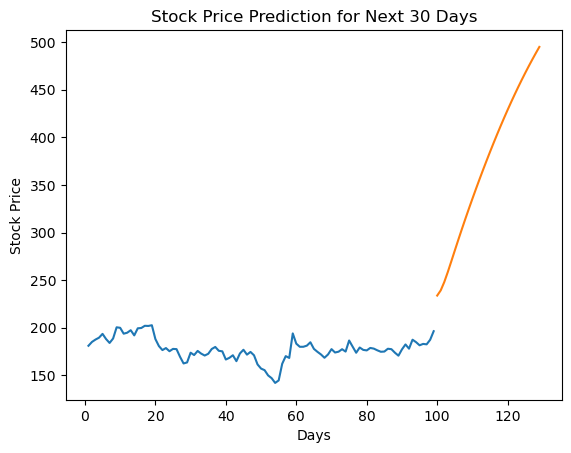

In [87]:
# Plot the original scaled data and the predictions
plt.plot(day_new, scaler.inverse_transform(df1[-99:]))  # Plot the last 99 days
plt.plot(day_pred, scaler.inverse_transform(lst_output))  # Plot the next 30 days
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction for Next 30 Days")
plt.show()


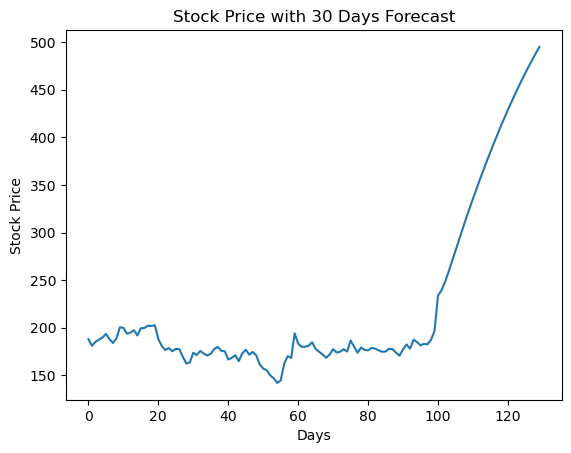

In [89]:
# Extending the data for visualization
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(scaler.inverse_transform(df3[-130:]))  # Plot the extended data (last 100 days + next 30 days)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Stock Price with 30 Days Forecast")
plt.show()